In [1]:
import pandas as pd
import numpy as np
import scipy
import rtree
import fiona
from shapely.geometry import Point
import geopandas
import pysal
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns

/Users/JTES/anaconda3/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
import geopandas as gpd
trucks = gpd.read_file('Haiti_osm_results_trucks.geojson')

In [6]:
def display_all(trucks):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(trucks)

In [8]:
display_all(trucks.head())

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,imaging_ts,max_score,measured_count,measurement_id,off_nadir_angle_deg,provider,scene,scene_source,scores,area_km2,boundary_wkt,centroid_wkt,id,name,Date,cloud_cover,geometry
0,1,1734,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.0,0.149443,None,None,2015-01-15T16:21:20,1,9,0c65aee0-8363-46b3-9145-1732070ba322,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.149443,MULTIPOLYGON (((-73.7474337542825964 18.215477...,POINT (-73.75694042776661 18.22631374204595),2299122c-05ae-45ff-ad9a-82cbeb100ea1,Les_Cayesprimary,2015-01-15,0.14,"(POINT (-73.7542528084584 18.2110254329004), P..."
1,2,5417,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.0,0.151695,None,None,2015-01-15T16:21:20,1,5,0296054c-004f-43fc-b343-4f50eec78e38,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.151696,MULTIPOLYGON (((-73.7935434618531048 18.181012...,POINT (-73.76574870423208 18.19599424396052),010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,Les_Cayessecondary,2015-01-15,0.14,"(POINT (-73.7506130918695 18.1988230519481), P..."
2,3,4008,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.0,0.148206,None,None,2015-01-15T16:21:20,1,20,e7671dc4-fc12-4f9f-9269-2a34da5c5fd4,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.148206,MULTIPOLYGON (((-73.7384643317882933 18.193036...,POINT (-73.75270090446548 18.19532474523495),b7218d9f-d98f-49de-b9d7-6f0053b97a2e,Les_Cayestertiary,2015-01-15,0.14,"(POINT (-73.74334559517069 18.1937545093795), ..."
3,4,2695,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,aafe70f2-f696-4728-948f-e388122b0d69,1.0,0.138345,None,None,2015-02-08T15:33:30,1,7,4a11365c-eee3-4cb4-b8e6-ac6f2d79f242,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.138345,MULTIPOLYGON (((-72.2636710561570936 18.576074...,POINT (-72.27123551463775 18.57577615251574),aafe70f2-f696-4728-948f-e388122b0d69,Tabarresecondary,2015-02-08,0.01,"(POINT (-72.25147990543729 18.58005501443), PO..."
4,5,1851,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,410c5777-c6b3-42b3-9b61-3782857c55bb,1.0,0.137049,None,None,2015-02-08T15:33:30,1,2,1dc709bf-e5a5-4114-8b1d-5bc5f53ee106,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.137049,MULTIPOLYGON (((-72.2992207586218001 18.634902...,POINT (-72.28664599164894 18.6271857557744),410c5777-c6b3-42b3-9b61-3782857c55bb,Croix_de_Bouquets_Morpeautertiary,2015-02-08,0.01,"(POINT (-72.2936028368794 18.6269255050505), P..."


In [9]:
#total number of trucks detected
trucks['measured_count'].sum()

33958

In [10]:
trucks.columns

Index(['field_1', 'Unnamed: 0', 'algorithm', 'algorithm_instance', 'aoi_id',
       'aoi_scene_area_coverage', 'aoi_scene_area_km2', 'aoi_scene_geometry',
       'classes', 'imaging_ts', 'max_score', 'measured_count',
       'measurement_id', 'off_nadir_angle_deg', 'provider', 'scene',
       'scene_source', 'scores', 'area_km2', 'boundary_wkt', 'centroid_wkt',
       'id', 'name', 'Date', 'cloud_cover', 'geometry'],
      dtype='object')

In [11]:
#Run to plot
#trucks['geometry'].plot(figsize=(30,20), color='red')

In [12]:
#Convert 'imaging_ts'to datetime format

trucks['imaging_ts'] = pd.to_datetime(trucks['imaging_ts'])
print(trucks['imaging_ts'].dtype)

datetime64[ns]


In [13]:
trucks['imaging_ts'].head()

0   2015-01-15 16:21:20
1   2015-01-15 16:21:20
2   2015-01-15 16:21:20
3   2015-02-08 15:33:30
4   2015-02-08 15:33:30
Name: imaging_ts, dtype: datetime64[ns]

In [14]:
#Converting numeric day to NAME
#Do this conversion first BEFORE setting datetime to index 

trucks['Day_of_Week'] = trucks['imaging_ts'].dt.day_name()
trucks['Day_of_Week'].head()

0    Thursday
1    Thursday
2    Thursday
3      Sunday
4      Sunday
Name: Day_of_Week, dtype: object

In [15]:
trucks.set_index('imaging_ts', inplace=True)

In [16]:
trucks["YEAR"] = trucks.index.year
trucks["MONTH"] = trucks.index.month
trucks["DAY"] = trucks.index.day
trucks["HOUR"] = trucks.index.hour
trucks["TIME"] = trucks.index.time

In [17]:
display_all(trucks.head())

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,max_score,measured_count,measurement_id,off_nadir_angle_deg,provider,scene,scene_source,scores,area_km2,boundary_wkt,centroid_wkt,id,name,Date,cloud_cover,geometry,Day_of_Week,YEAR,MONTH,DAY,HOUR,TIME
imaging_ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-15 16:21:20,1,1734,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.0,0.149443,None,None,1,9,0c65aee0-8363-46b3-9145-1732070ba322,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.149443,MULTIPOLYGON (((-73.7474337542825964 18.215477...,POINT (-73.75694042776661 18.22631374204595),2299122c-05ae-45ff-ad9a-82cbeb100ea1,Les_Cayesprimary,2015-01-15,0.14,"(POINT (-73.7542528084584 18.2110254329004), P...",Thursday,2015,1,15,16,16:21:20
2015-01-15 16:21:20,2,5417,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.0,0.151695,None,None,1,5,0296054c-004f-43fc-b343-4f50eec78e38,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.151696,MULTIPOLYGON (((-73.7935434618531048 18.181012...,POINT (-73.76574870423208 18.19599424396052),010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,Les_Cayessecondary,2015-01-15,0.14,"(POINT (-73.7506130918695 18.1988230519481), P...",Thursday,2015,1,15,16,16:21:20
2015-01-15 16:21:20,3,4008,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.0,0.148206,None,None,1,20,e7671dc4-fc12-4f9f-9269-2a34da5c5fd4,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.148206,MULTIPOLYGON (((-73.7384643317882933 18.193036...,POINT (-73.75270090446548 18.19532474523495),b7218d9f-d98f-49de-b9d7-6f0053b97a2e,Les_Cayestertiary,2015-01-15,0.14,"(POINT (-73.74334559517069 18.1937545093795), ...",Thursday,2015,1,15,16,16:21:20
2015-02-08 15:33:30,4,2695,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,aafe70f2-f696-4728-948f-e388122b0d69,1.0,0.138345,None,None,1,7,4a11365c-eee3-4cb4-b8e6-ac6f2d79f242,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.138345,MULTIPOLYGON (((-72.2636710561570936 18.576074...,POINT (-72.27123551463775 18.57577615251574),aafe70f2-f696-4728-948f-e388122b0d69,Tabarresecondary,2015-02-08,0.01,"(POINT (-72.25147990543729 18.58005501443), PO...",Sunday,2015,2,8,15,15:33:30
2015-02-08 15:33:30,5,1851,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,410c5777-c6b3-42b3-9b61-3782857c55bb,1.0,0.137049,None,None,1,2,1dc709bf-e5a5-4114-8b1d-5bc5f53ee106,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.137049,MULTIPOLYGON (((-72.2992207586218001 18.634902...,POINT (-72.28664599164894 18.6271857557744),410c5777-c6b3-42b3-9b61-3782857c55bb,Croix_de_Bouquets_Morpeautertiary,2015-02-08,0.01,"(POINT (-72.2936028368794 18.6269255050505), P...",Sunday,2015,2,8,15,15:33:30


In [18]:
#use regular expressions to clean up string data 
import re

In [20]:
#Part 1: Cleaning the 'name' column which puts together the city + type of road - primary/secondary/tertiary
#Created separate columns for type of road

trucks["Primary_Road"] = trucks["name"].map(lambda x: 1 if 'primary' in str(x).lower() else 0)
trucks["Secondary_Road"] = trucks["name"].map(lambda x: 1 if 'secondary' in str(x).lower() else 0)
trucks["Tertiary_Road"] = trucks["name"].map(lambda x: 1 if 'tertiary' in str(x).lower() else 0)

In [21]:
trucks.head()

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,max_score,...,geometry,Day_of_Week,YEAR,MONTH,DAY,HOUR,TIME,Primary_Road,Secondary_Road,Tertiary_Road
imaging_ts,,,,,,,,,,,,,,,,,,,,,
2015-01-15 16:21:20,1,1734,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.0,0.149443,None,None,1,...,"(POINT (-73.7542528084584 18.2110254329004), P...",Thursday,2015,1,15,16,16:21:20,1,0,0
2015-01-15 16:21:20,2,5417,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.0,0.151695,None,None,1,...,"(POINT (-73.7506130918695 18.1988230519481), P...",Thursday,2015,1,15,16,16:21:20,0,1,0
2015-01-15 16:21:20,3,4008,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.0,0.148206,None,None,1,...,"(POINT (-73.74334559517069 18.1937545093795), ...",Thursday,2015,1,15,16,16:21:20,0,0,1
2015-02-08 15:33:30,4,2695,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,aafe70f2-f696-4728-948f-e388122b0d69,1.0,0.138345,None,None,1,...,"(POINT (-72.25147990543729 18.58005501443), PO...",Sunday,2015,2,8,15,15:33:30,0,1,0
2015-02-08 15:33:30,5,1851,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,410c5777-c6b3-42b3-9b61-3782857c55bb,1.0,0.137049,None,None,1,...,"(POINT (-72.2936028368794 18.6269255050505), P...",Sunday,2015,2,8,15,15:33:30,0,0,1


In [22]:
#Part 2: Separating city in 'name' column

trucks["Area_Primary"] = trucks["name"].str.extract("(^.+?(?=primary))", expand=True)
trucks["Area_Secondary"] = trucks["name"].str.extract("(^.+?(?=secondary))", expand=True)
trucks["Area_Tertiary"] = trucks["name"].str.extract("(^.+?(?=tertiary))", expand=True)

In [23]:
#Part 3: Combining extracted city name from 'name' column into 1 column, 'AREA'
trucks["AREA"] = trucks["Area_Secondary"].map(str) + trucks["Area_Primary"].map(str) + trucks["Area_Tertiary"].map(str) 


In [24]:
#Part 4: Removing 'nan' from 'AREA' column

trucks["AREA"] = trucks["AREA"].str.strip('nan')

In [25]:
display_all(trucks.head())

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,max_score,measured_count,measurement_id,off_nadir_angle_deg,provider,scene,scene_source,scores,area_km2,boundary_wkt,centroid_wkt,id,name,Date,cloud_cover,geometry,Day_of_Week,YEAR,MONTH,DAY,HOUR,TIME,Primary_Road,Secondary_Road,Tertiary_Road,Area_Primary,Area_Secondary,Area_Tertiary,AREA
imaging_ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-15 16:21:20,1,1734,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.0,0.149443,None,None,1,9,0c65aee0-8363-46b3-9145-1732070ba322,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.149443,MULTIPOLYGON (((-73.7474337542825964 18.215477...,POINT (-73.75694042776661 18.22631374204595),2299122c-05ae-45ff-ad9a-82cbeb100ea1,Les_Cayesprimary,2015-01-15,0.14,"(POINT (-73.7542528084584 18.2110254329004), P...",Thursday,2015,1,15,16,16:21:20,1,0,0,Les_Cayes,NaN,NaN,Les_Cayes
2015-01-15 16:21:20,2,5417,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.0,0.151695,None,None,1,5,0296054c-004f-43fc-b343-4f50eec78e38,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.151696,MULTIPOLYGON (((-73.7935434618531048 18.181012...,POINT (-73.76574870423208 18.19599424396052),010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,Les_Cayessecondary,2015-01-15,0.14,"(POINT (-73.7506130918695 18.1988230519481), P...",Thursday,2015,1,15,16,16:21:20,0,1,0,NaN,Les_Cayes,NaN,Les_Cayes
2015-01-15 16:21:20,3,4008,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.0,0.148206,None,None,1,20,e7671dc4-fc12-4f9f-9269-2a34da5c5fd4,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.148206,MULTIPOLYGON (((-73.7384643317882933 18.193036...,POINT (-73.75270090446548 18.19532474523495),b7218d9f-d98f-49de-b9d7-6f0053b97a2e,Les_Cayestertiary,2015-01-15,0.14,"(POINT (-73.74334559517069 18.1937545093795), ...",Thursday,2015,1,15,16,16:21:20,0,0,1,NaN,NaN,Les_Cayes,Les_Cayes
2015-02-08 15:33:30,4,2695,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,aafe70f2-f696-4728-948f-e388122b0d69,1.0,0.138345,None,None,1,7,4a11365c-eee3-4cb4-b8e6-ac6f2d79f242,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.138345,MULTIPOLYGON (((-72.2636710561570936 18.576074...,POINT (-72.27123551463775 18.57577615251574),aafe70f2-f696-4728-948f-e388122b0d69,Tabarresecondary,2015-02-08,0.01,"(POINT (-72.25147990543729 18.58005501443), PO...",Sunday,2015,2,8,15,15:33:30,0,1,0,NaN,Tabarre,NaN,Tabarre
2015-02-08 15:33:30,5,1851,TRUCK_DETECTOR_HR,truckstops_us_v2.0.0,410c5777-c6b3-42b3-9b61-3782857c55bb,1.0,0.137049,None,None,1,2,1dc709bf-e5a5-4114-8b1d-5bc5f53ee106,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.137049,MULTIPOLYGON (((-72.2992207586218001 18.634902...,POINT (-72.28664599164894 18.6271857557744),410c5777-c6b3-42b3-9b61-3782857c55bb,Croix_de_Bouquets_Morpeautertiary,2015-02-08,0.01,"(POINT (-72.2936028368794 18.6269255050505), P...",Sunday,2015,2,8,15,15:33:30,0,0,1,NaN,NaN,Croix_de_Bouquets_Morpeau,Croix_de_Bouquets_Morpeau


In [26]:
trucks.columns

Index(['field_1', 'Unnamed: 0', 'algorithm', 'algorithm_instance', 'aoi_id',
       'aoi_scene_area_coverage', 'aoi_scene_area_km2', 'aoi_scene_geometry',
       'classes', 'max_score', 'measured_count', 'measurement_id',
       'off_nadir_angle_deg', 'provider', 'scene', 'scene_source', 'scores',
       'area_km2', 'boundary_wkt', 'centroid_wkt', 'id', 'name', 'Date',
       'cloud_cover', 'geometry', 'Day_of_Week', 'YEAR', 'MONTH', 'DAY',
       'HOUR', 'TIME', 'Primary_Road', 'Secondary_Road', 'Tertiary_Road',
       'Area_Primary', 'Area_Secondary', 'Area_Tertiary', 'AREA'],
      dtype='object')

In [27]:
#Created new dataframe with only the columns that I need 

trucks1 = trucks[['YEAR','MONTH','Day_of_Week','HOUR','TIME','AREA','Primary_Road','Secondary_Road','Tertiary_Road','measured_count','cloud_cover','geometry','boundary_wkt','centroid_wkt']].copy()

#new = old[['A', 'C', 'D']].copy()

In [28]:
trucks1.head()

,YEAR,MONTH,Day_of_Week,HOUR,TIME,AREA,Primary_Road,Secondary_Road,Tertiary_Road,measured_count,cloud_cover,geometry,boundary_wkt,centroid_wkt
imaging_ts,,,,,,,,,,,,,,
2015-01-15 16:21:20,2015,1,Thursday,16,16:21:20,Les_Cayes,1,0,0,9,0.14,"(POINT (-73.7542528084584 18.2110254329004), P...",MULTIPOLYGON (((-73.7474337542825964 18.215477...,POINT (-73.75694042776661 18.22631374204595)
2015-01-15 16:21:20,2015,1,Thursday,16,16:21:20,Les_Cayes,0,1,0,5,0.14,"(POINT (-73.7506130918695 18.1988230519481), P...",MULTIPOLYGON (((-73.7935434618531048 18.181012...,POINT (-73.76574870423208 18.19599424396052)
2015-01-15 16:21:20,2015,1,Thursday,16,16:21:20,Les_Cayes,0,0,1,20,0.14,"(POINT (-73.74334559517069 18.1937545093795), ...",MULTIPOLYGON (((-73.7384643317882933 18.193036...,POINT (-73.75270090446548 18.19532474523495)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Tabarre,0,1,0,7,0.01,"(POINT (-72.25147990543729 18.58005501443), PO...",MULTIPOLYGON (((-72.2636710561570936 18.576074...,POINT (-72.27123551463775 18.57577615251574)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Croix_de_Bouquets_Morpeau,0,0,1,2,0.01,"(POINT (-72.2936028368794 18.6269255050505), P...",MULTIPOLYGON (((-72.2992207586218001 18.634902...,POINT (-72.28664599164894 18.6271857557744)


In [29]:
trucks1.describe()

,YEAR,MONTH,HOUR,Primary_Road,Secondary_Road,Tertiary_Road,measured_count,cloud_cover
count,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000
mean,2016.587940,6.165829,15.335427,0.291876,0.326633,0.381491,14.220268,0.097542
std,1.235987,3.759770,0.843994,0.454721,0.469080,0.485854,16.670419,0.108937
min,2015.000000,1.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2015.000000,3.000000,15.000000,0.000000,0.000000,0.000000,3.000000,0.010000
50%,2017.000000,6.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.060000
75%,2018.000000,10.000000,15.000000,1.000000,1.000000,1.000000,19.000000,0.150000
max,2019.000000,12.000000,18.000000,1.000000,1.000000,1.000000,146.000000,0.480000


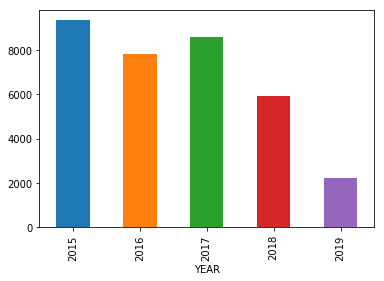

In [30]:
#'measured_count' refers to count of vehicles 
dfchart_year = trucks1.groupby(["YEAR"])["measured_count"].sum()

dfchart_year.plot.bar()

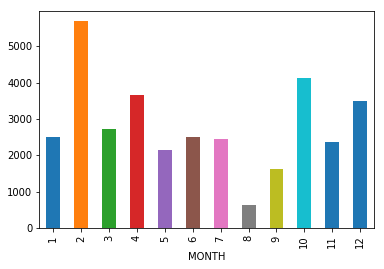

In [31]:
dfchart_month = trucks1.groupby(["MONTH"])["measured_count"].sum()

dfchart_month.plot.bar()

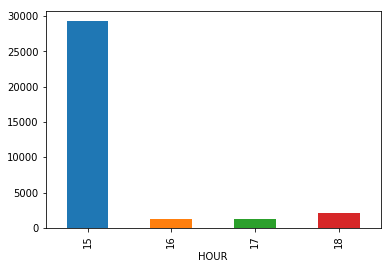

In [32]:
dfchart_hour = trucks1.groupby(["HOUR"])["measured_count"].sum()

dfchart_hour.plot.bar()

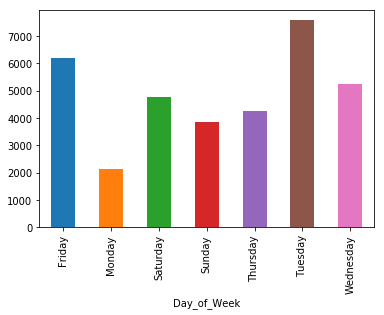

In [33]:
dfchart_day = trucks1.groupby(["Day_of_Week"])["measured_count"].sum()

dfchart_day.plot.bar()

/Users/JTES/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


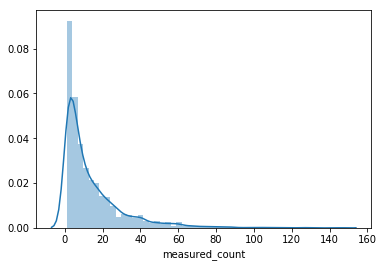

In [34]:
sns.distplot(trucks1['measured_count'])

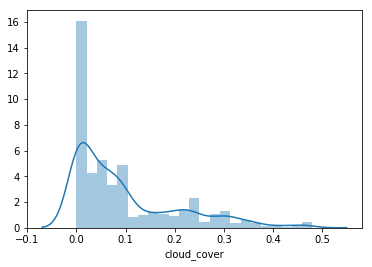

In [35]:
sns.distplot(trucks1['cloud_cover'])

In [36]:
trucks1.groupby(["AREA"])["Primary_Road","Secondary_Road","Tertiary_Road"].sum()

,Primary_Road,Secondary_Road,Tertiary_Road
AREA,,,
Cap_Haitie,31,29,29
Cap_Haitien_Cormier,0,0,26
Cap_Haitien_Fort_Saint_Michel,30,3,26
Carrefour_Clocher,36,0,31
Carrefour_Fontamar,0,19,0
Carrefour_Thor_Le_Volant,48,0,41
Cite_Soleil,0,69,58
Cite_Soleil_Blanchard,0,0,39
Croix_de_Bouquets_Morpeau,65,65,55


In [ ]:
total_trucks_Haiti = trucks1.groupby(["AREA"])["Primary_Road","Secondary_Road","Tertiary_Road"].sum()

In [39]:
all_trucks_Haiti = []
for city in range(total_trucks_Haiti.shape[0]):
    count = sum(total_trucks_Haiti.iloc[city,:])
    all_trucks_Haiti.append(count)
    


total_trucks_Haiti["Total"] = all_trucks_Haiti

In [40]:
total_trucks_Haiti.sort_values("Total", ascending=False)

,Primary_Road,Secondary_Road,Tertiary_Road,Total
AREA,,,,
Croix_de_Bouquets_Seguy,73,59,69,201
Tabarre_Carrefour_Clercine,65,61,64,190
Croix_de_Bouquets_Morpeau,65,65,55,185
Delmas,50,62,64,176
Port_au_Prince,53,61,60,174
Les_Cayes,56,47,46,149
Croix_des_Bouquets_Noailles,44,39,62,145
Cite_Soleil,0,69,58,127
Petion_Ville,0,59,65,124


In [42]:
trucks1.groupby(["YEAR"])["measured_count","Primary_Road","Secondary_Road","Tertiary_Road"].sum()

,measured_count,Primary_Road,Secondary_Road,Tertiary_Road
YEAR,,,,
2015,9341,171,198,238
2016,7824,156,168,210
2017,8609,185,226,235
2018,5939,136,136,166
2019,2245,49,52,62


In [43]:
trucks1.groupby(["HOUR"])["measured_count","Primary_Road","Secondary_Road","Tertiary_Road"].sum()

,measured_count,Primary_Road,Secondary_Road,Tertiary_Road
HOUR,,,,
15,29310,584,669,768
16,1300,25,27,31
17,1282,43,39,52
18,2066,45,45,60


In [44]:
#From this new dataframe, I am creating 'city' level dataframes: one for Cap-Haitien and one for Port-au-Prince

In [45]:
#Creating dataframe for Cap Haitien (CAP)

trucks_CAP = trucks1[trucks1['AREA'].isin(['Cap_Haitie','Cap_Haitien_Cormier','Cap_Haitien_Fort_Saint_Michel','Quartier_Mori'])]
trucks_CAP.head()

,YEAR,MONTH,Day_of_Week,HOUR,TIME,AREA,Primary_Road,Secondary_Road,Tertiary_Road,measured_count,cloud_cover,geometry,boundary_wkt,centroid_wkt
imaging_ts,,,,,,,,,,,,,,
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Cap_Haitie,0,0,1,26,0.1,"(POINT (-72.1943110348771 19.7687905844156), P...",MULTIPOLYGON (((-72.2009676388108943 19.757069...,POINT (-72.20590779485249 19.75709862267777)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Cap_Haitien_Fort_Saint_Michel,0,0,1,2,0.1,"(POINT (-72.2019058509624 19.753134018759), PO...",MULTIPOLYGON (((-72.1940110977154035 19.737545...,POINT (-72.19694811903381 19.7448544373434)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Cap_Haitien_Cormier,0,0,1,1,0.1,(POINT (-72.2110062893082 19.7738501082251)),MULTIPOLYGON (((-72.2424468118491063 19.782620...,POINT (-72.22192887563028 19.78010165106515)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Quartier_Mori,0,0,1,4,0.1,"(POINT (-72.1560839760069 19.7245896464647), P...",MULTIPOLYGON (((-72.1588819257315066 19.696726...,POINT (-72.16265894273336 19.71706870499404)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Cap_Haitie,0,1,0,10,0.1,"(POINT (-72.19463502954071 19.7665945165945), ...",MULTIPOLYGON (((-72.2281495271838025 19.721888...,POINT (-72.2017165736675 19.75575534166283)


In [46]:
len(trucks_CAP)

258

In [47]:
#5.84% of trucks observed are in Cap Haitien 
(trucks_CAP['measured_count'].sum() / trucks['measured_count'].sum()) * 100

5.848400965899052

In [48]:
trucks_CAP['measured_count'].sum()

1986

In [49]:
from shapely import wkt

trucks_CAP['boundary_wkt'] = trucks_CAP['boundary_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
trucks_CAP['centroid_wkt'] = trucks_CAP['centroid_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


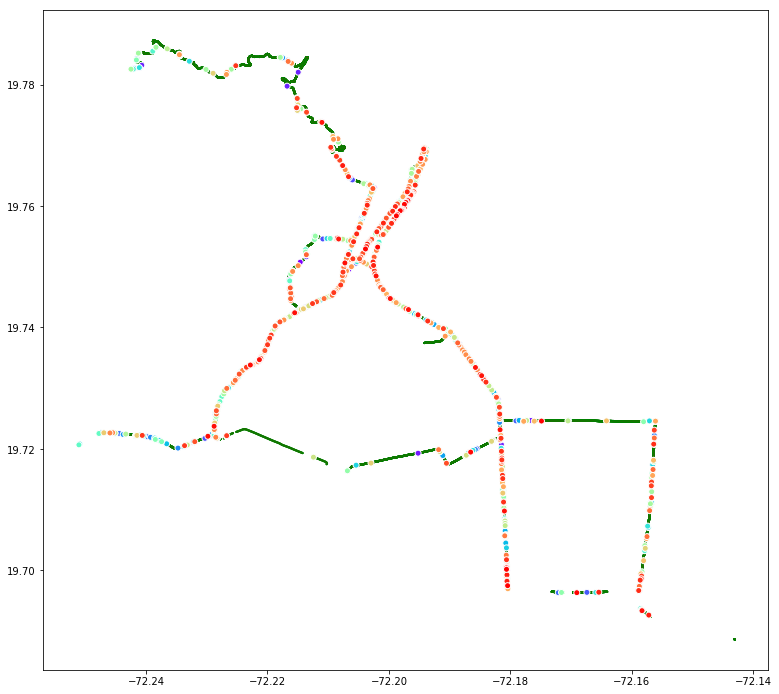

In [51]:
fig,ax = plt.subplots(1,1,figsize=(13,13))


trucks_CAP.set_geometry('boundary_wkt').plot(edgecolor = 'green',color='red', ax = ax)
#world[world.name=='Haiti'].plot(edgecolor = 'black',color='white', ax = ax)
trucks_CAP.plot(cmap = 'rainbow',edgecolor = 'white',ax = ax)
plt.show()

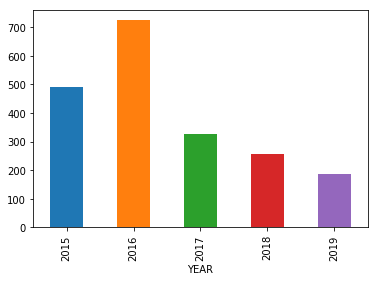

In [52]:
dfchartCAP_year = trucks_CAP.groupby(["YEAR"])["measured_count"].sum()

dfchartCAP_year.plot.bar()

In [53]:
trucks_CAP.groupby(["YEAR"])["measured_count"].sum()

YEAR
2015    491
2016    724
2017    327
2018    256
2019    188
Name: measured_count, dtype: int64

In [54]:
trucks_CAP.groupby(["YEAR"])["measured_count"].count()

YEAR
2015    57
2016    90
2017    48
2018    33
2019    30
Name: measured_count, dtype: int64

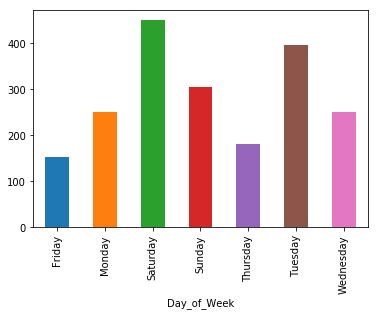

In [60]:
dfchartCAP_year_day = trucks_CAP.groupby(["Day_of_Week"])["measured_count"].sum()

dfchartCAP_year_day.plot.bar()

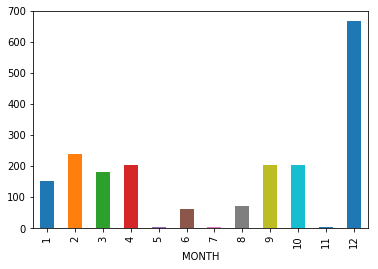

In [59]:
dfchartCAP_month = trucks_CAP.groupby(["MONTH"])["measured_count"].sum()

dfchartCAP_month.plot.bar()

In [61]:
trucks_CAP.groupby(["YEAR"])["measured_count","Primary_Road","Secondary_Road","Tertiary_Road"].sum()

,measured_count,Primary_Road,Secondary_Road,Tertiary_Road
YEAR,,,,
2015,491,21,11,25
2016,724,34,17,39
2017,327,17,11,20
2018,256,14,5,14
2019,188,12,6,12


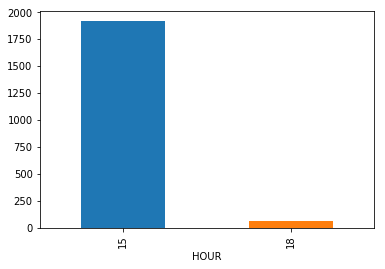

In [63]:

dfchartCAP_hour= trucks_CAP.groupby(["HOUR"])["measured_count"].sum()

dfchartCAP_hour.plot.bar()


In [65]:
#Creating dataframe in CSV format
trucks_CAP.to_csv(r'Desktop\trucks_CAP_0719.csv')

In [66]:
#Creating dataframe for Port-au-Prince (PAP)

trucks_PAP = trucks1[trucks1['AREA'].isin(['Carrefour_Clocher','Carrefour_Fontamar', 'Carrefour_Thor_Le_Volant','Cite_Soleil','Cite_Soleil_Blanchard','Croix_de_Bouquets_Seguy', 'Croix_de_Bouquets_Morpeau','Croix_des_Bouquets_Noailles','Delmas','Petion_Ville','Petion_Ville_Boutilliers','Port_au_Prince','Port_au_Prince_Sevane_Salee','Port_au_Prince_Campeche','Tabarre','Tabarre_Carrefour_Clercine'])]
trucks_PAP.head()

,YEAR,MONTH,Day_of_Week,HOUR,TIME,AREA,Primary_Road,Secondary_Road,Tertiary_Road,measured_count,cloud_cover,geometry,boundary_wkt,centroid_wkt
imaging_ts,,,,,,,,,,,,,,
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Tabarre,0,1,0,7,0.01,"(POINT (-72.25147990543729 18.58005501443), PO...",MULTIPOLYGON (((-72.2636710561570936 18.576074...,POINT (-72.27123551463775 18.57577615251574)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Croix_de_Bouquets_Morpeau,0,0,1,2,0.01,"(POINT (-72.2936028368794 18.6269255050505), P...",MULTIPOLYGON (((-72.2992207586218001 18.634902...,POINT (-72.28664599164894 18.6271857557744)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Croix_des_Bouquets_Noailles,0,1,0,1,0.01,(POINT (-72.2426288416076 18.5820120851371)),MULTIPOLYGON (((-72.2489739175915986 18.581053...,POINT (-72.24421301471517 18.58217768026723)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Petion_Ville_Boutilliers,0,1,0,2,0.01,"(POINT (-72.311966175359 18.4882395382395), PO...",MULTIPOLYGON (((-72.3141874870262029 18.486207...,POINT (-72.31397863117427 18.49426086902983)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Cite_Soleil,0,0,1,1,0.01,(POINT (-72.3191300236407 18.5883567821068)),MULTIPOLYGON (((-72.3313098257653024 18.576166...,POINT (-72.32626086320271 18.5935228904622)


In [67]:

trucks_PAP['AREA'].value_counts()

Croix_de_Bouquets_Seguy        201
Tabarre_Carrefour_Clercine     190
Croix_de_Bouquets_Morpeau      185
Delmas                         176
Port_au_Prince                 174
Croix_des_Bouquets_Noailles    145
Cite_Soleil                    127
Petion_Ville                   124
Tabarre                        111
Port_au_Prince_Sevane_Salee     92
Carrefour_Thor_Le_Volant        89
Carrefour_Clocher               67
Petion_Ville_Boutilliers        65
Cite_Soleil_Blanchard           39
Carrefour_Fontamar              19
Port_au_Prince_Campeche          6
Name: AREA, dtype: int64

In [68]:
#Total count of cars in Port-Au-Prince area
trucks_PAP['measured_count'].sum()

30205

In [69]:
(trucks_PAP['measured_count'].sum() / trucks['measured_count'].sum()) * 100

88.94811237410919

In [70]:
trucks_PAP['boundary_wkt'] = trucks_PAP['boundary_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
trucks_PAP['centroid_wkt'] = trucks_PAP['centroid_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


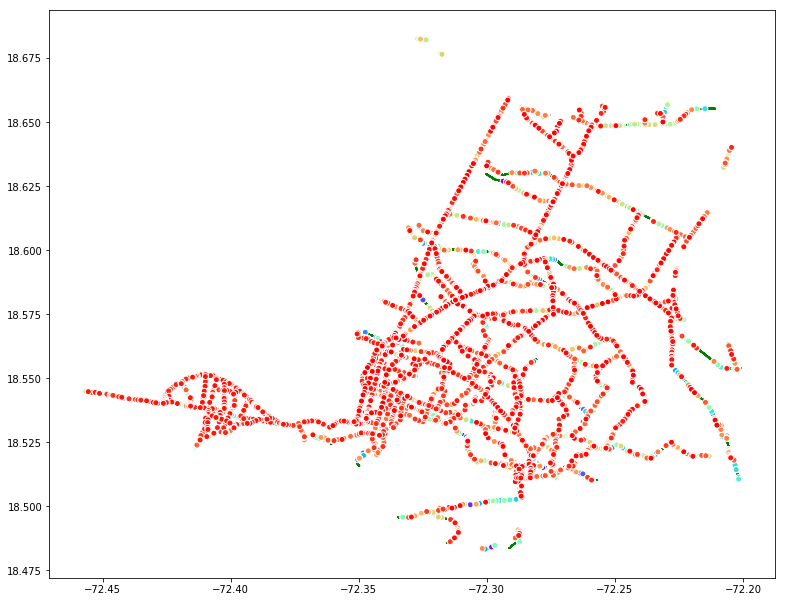

In [73]:
fig,ax = plt.subplots(1,1,figsize=(13,13))


trucks_PAP.set_geometry('boundary_wkt').plot(edgecolor = 'green',color='red', ax = ax)
#world[world.name=='Haiti'].plot(edgecolor = 'black',color='white', ax = ax)
trucks_PAP.plot(cmap = 'rainbow',edgecolor = 'white',ax = ax)
plt.show()

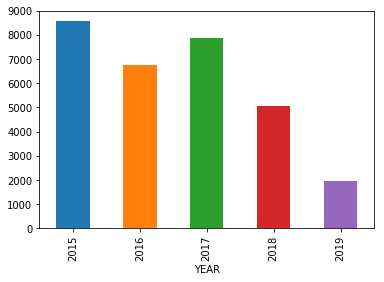

In [74]:
dfchartPAP_year = trucks_PAP.groupby(["YEAR"])["measured_count"].sum()

dfchartPAP_year.plot.bar()

In [77]:
trucks_PAP.groupby(["YEAR"])["measured_count"].sum()

YEAR
2015    8557
2016    6759
2017    7853
2018    5077
2019    1959
Name: measured_count, dtype: int64

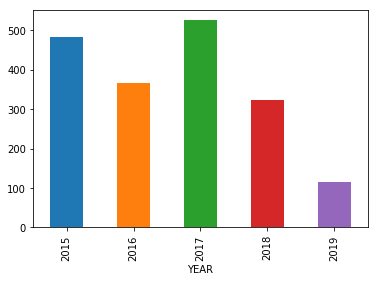

In [75]:
dfchartPAP_year_COUNT = trucks_PAP.groupby(["YEAR"])["measured_count"].count()

dfchartPAP_year_COUNT.plot.bar()

In [76]:

#trucks_CAP.groupby(["YEAR"])["measured_count","Primary_Road","Secondary_Road","Tertiary_Road"].sum()

trucks_PAP.groupby(["YEAR"])["measured_count"].count()

YEAR
2015    484
2016    365
2017    525
2018    322
2019    114
Name: measured_count, dtype: int64

In [78]:
len(trucks_PAP)

1810

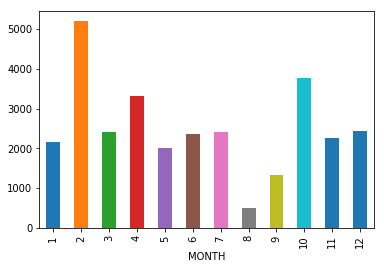

In [79]:
dfchartPAP_month = trucks_PAP.groupby(["MONTH"])["measured_count"].sum()

dfchartPAP_month.plot.bar()

In [80]:
total_PAP = trucks_PAP.groupby(["AREA"])["Primary_Road","Secondary_Road","Tertiary_Road"].sum()

In [81]:
all_trucks = []
for city in range(total_PAP.shape[0]):
    count = sum(total_PAP.iloc[city,:])
    all_trucks.append(count)
    


total_PAP["Total"] = all_trucks

In [82]:
total_PAP.sort_values("Total", ascending=False)

,Primary_Road,Secondary_Road,Tertiary_Road,Total
AREA,,,,
Croix_de_Bouquets_Seguy,73,59,69,201
Tabarre_Carrefour_Clercine,65,61,64,190
Croix_de_Bouquets_Morpeau,65,65,55,185
Delmas,50,62,64,176
Port_au_Prince,53,61,60,174
Croix_des_Bouquets_Noailles,44,39,62,145
Cite_Soleil,0,69,58,127
Petion_Ville,0,59,65,124
Tabarre,0,57,54,111


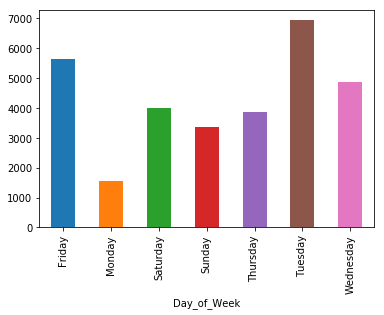

In [83]:
dfchartPAP_day= trucks_PAP.groupby(["Day_of_Week"])["measured_count"].sum()

dfchartPAP_day.plot.bar()

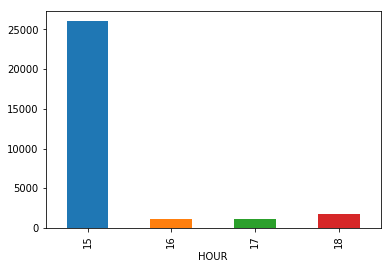

In [84]:
dfchartPAP_hour= trucks_PAP.groupby(["HOUR"])["measured_count"].sum()

dfchartPAP_hour.plot.bar()

In [85]:
trucks_PAP.to_csv(r'Desktop\trucks_PAP_0719.csv') 